# Importing the libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

# Importing the dataset

In [35]:
dataset = pd.read_csv("./water_potability.csv")

# Taking care of missing data

In [36]:
dataset.fillna(dataset.mean(), inplace=True)

# Descriptive Statistic

In [37]:
print("Descriptive Statistics:\n\n", dataset.describe())

Descriptive Statistics:

                 ph     Hardness        Solids  Chloramines      Sulfate  \
count  3276.000000  3276.000000   3276.000000  3276.000000  3276.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.469956    32.879761   8768.570828     1.583085    36.142612   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.277673   176.850538  15666.690297     6.127421   317.094638   
50%       7.080795   196.967627  20927.833607     7.130299   333.775777   
75%       7.870050   216.667456  27332.762127     8.114887   350.385756   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3276.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        15.769881   

# Data Visualization

Boxplot

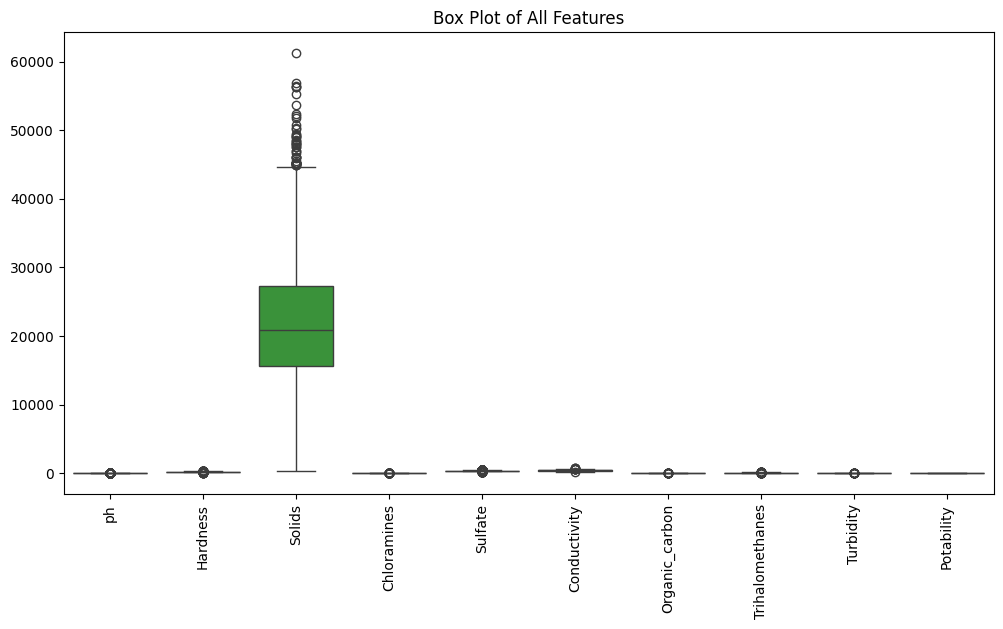

In [38]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataset)
plt.title('Box Plot of All Features')
plt.xticks(rotation=90)
plt.show()

Violin Plot for each feature

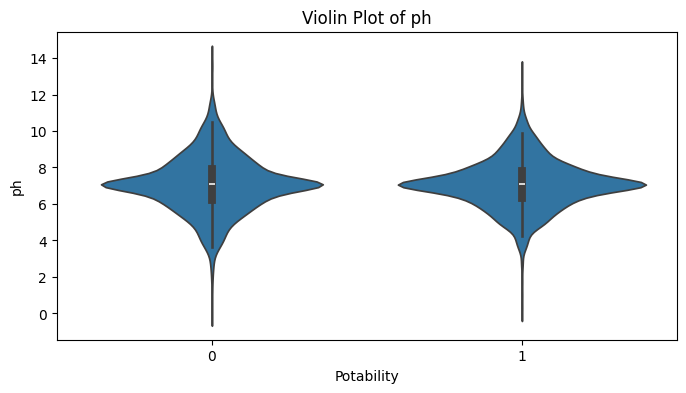

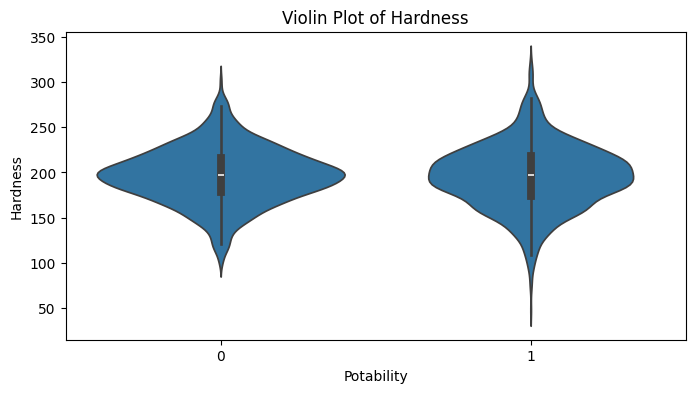

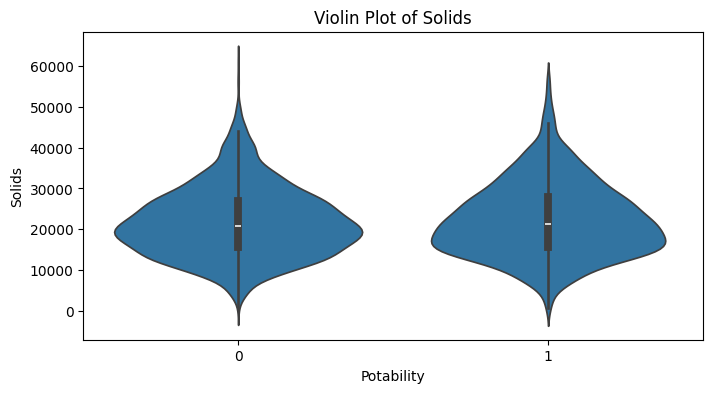

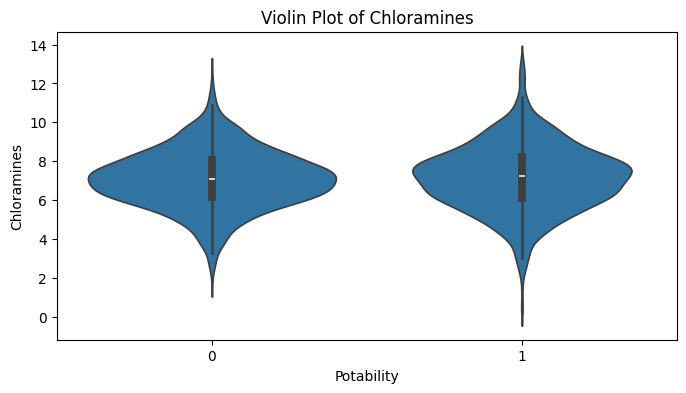

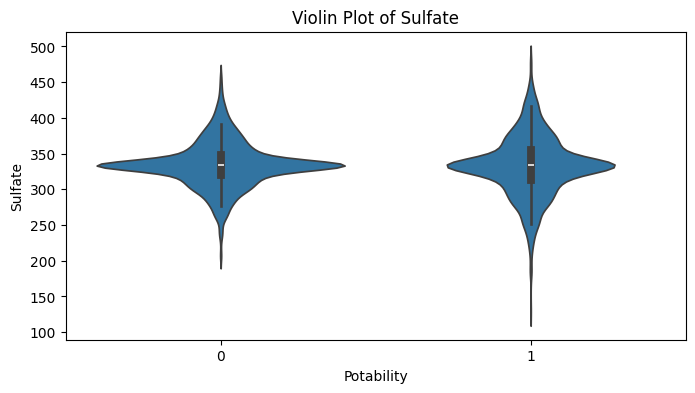

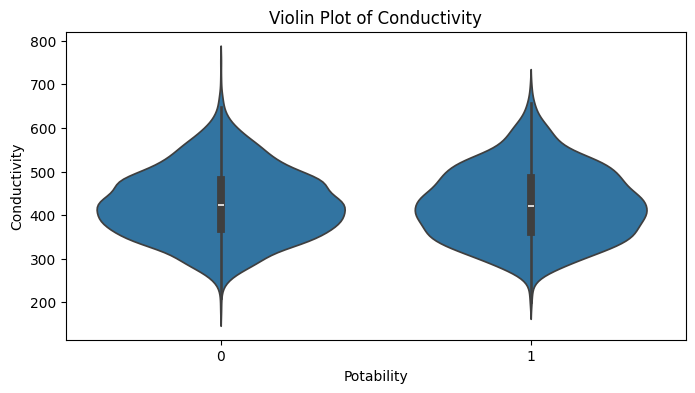

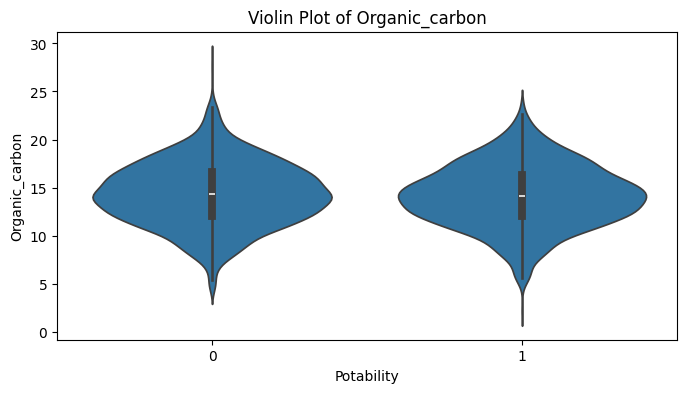

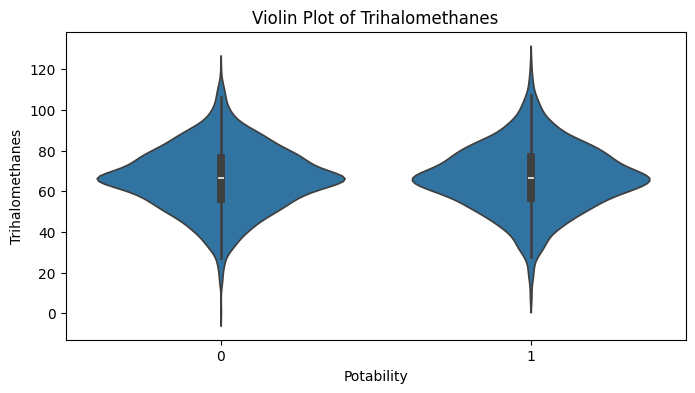

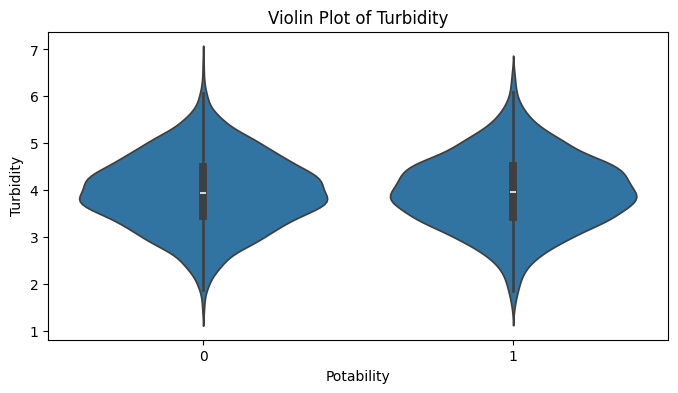

In [39]:
for column in dataset.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='Potability', y=column, data=dataset)
    plt.title(f'Violin Plot of {column}')
    plt.show()

Scatter Plot

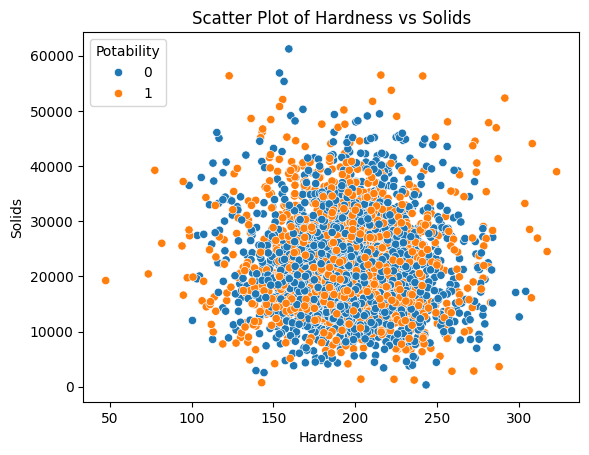

In [40]:
sns.scatterplot(x='Hardness', y='Solids', hue='Potability', data=dataset)
plt.title('Scatter Plot of Hardness vs Solids')
plt.show()

Correlation Heatmap

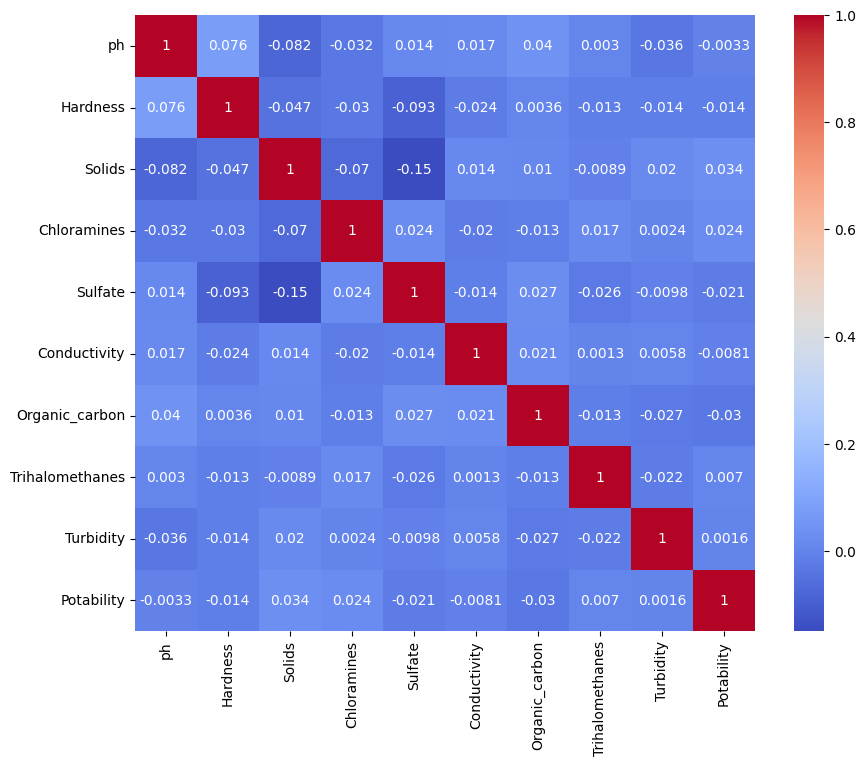

In [41]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.show()

# Probability Distributions

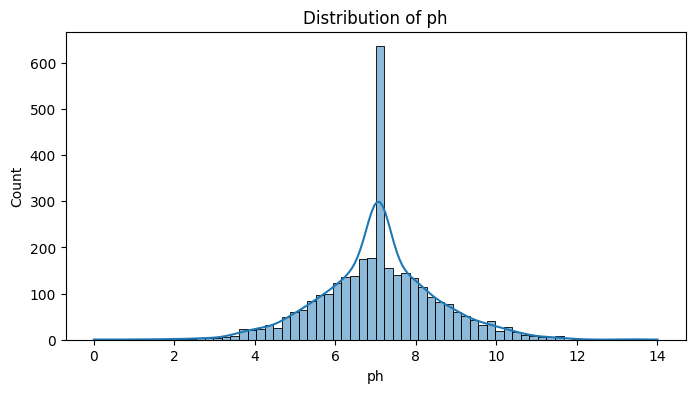

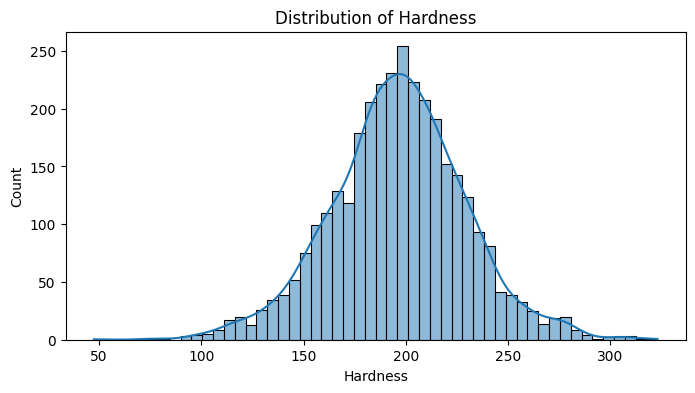

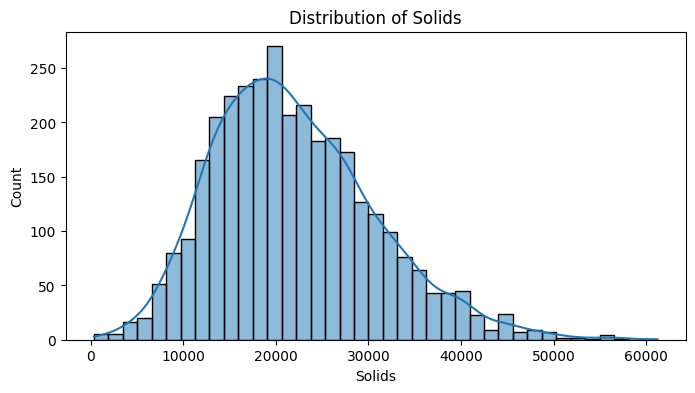

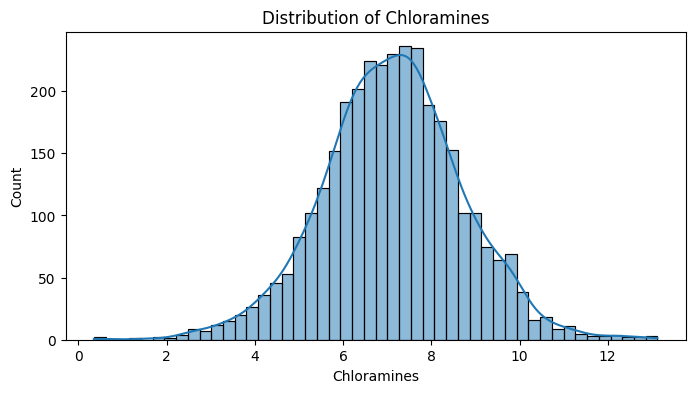

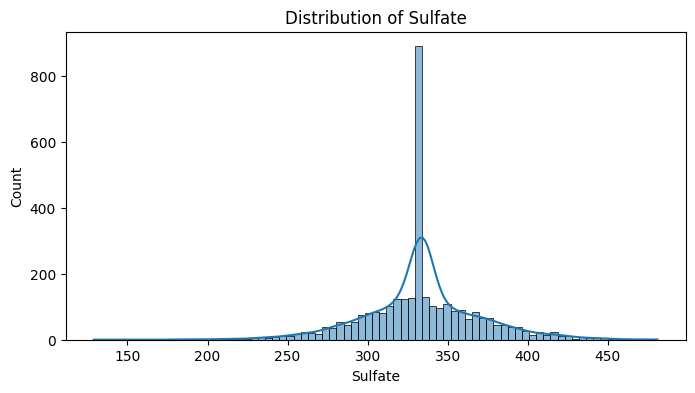

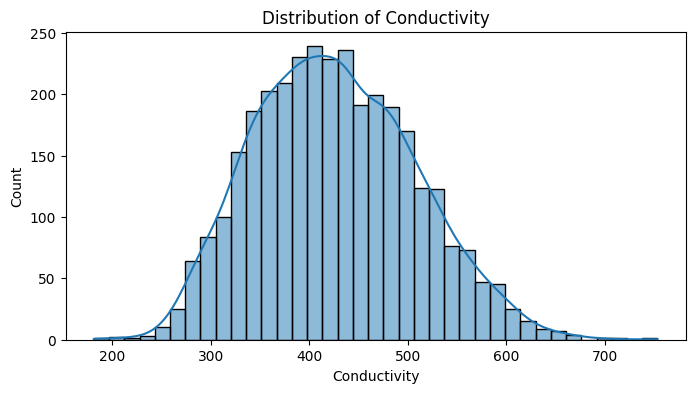

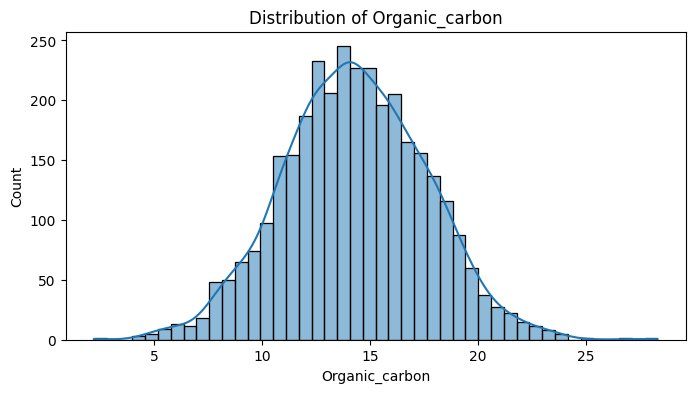

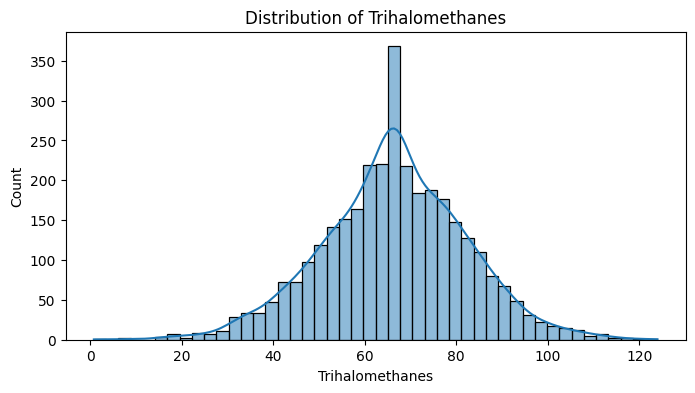

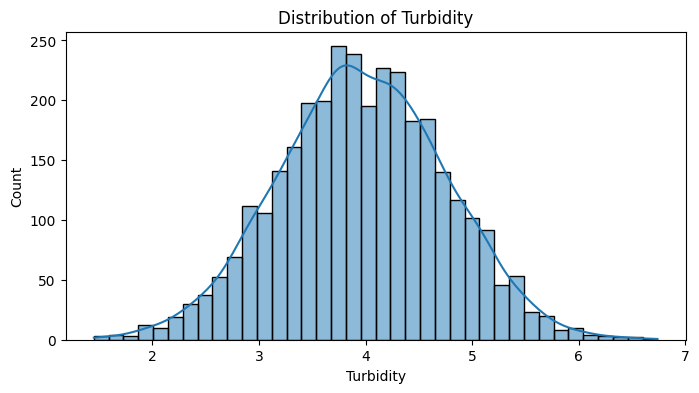

In [42]:
for column in dataset.columns[:-1]:
    plt.figure(figsize=(8, 4))
    sns.histplot(dataset[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()


# Linear Regression Model

Define features and target variable

In [43]:
X = dataset.drop('Potability', axis=1)
y = dataset['Potability']

Split the dataset into training and testing sets

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize and train the model

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Make predictions

In [46]:
y_pred = model.predict(X_test)

Evaluate the model

In [47]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [48]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.23366571408117137
R-squared: -0.00026628138264905843


Plotting Actual vs Predicted values

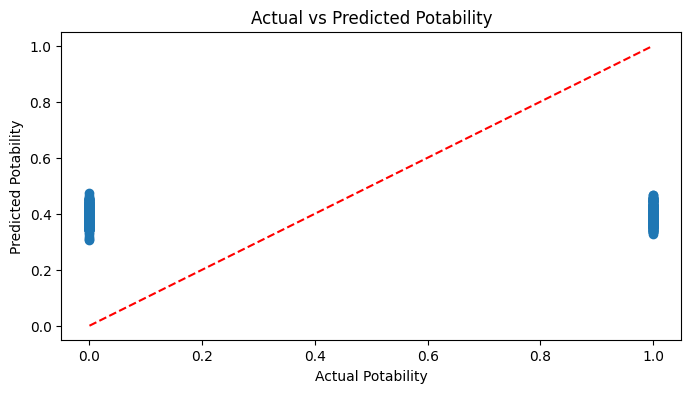

In [49]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel('Actual Potability')
plt.ylabel('Predicted Potability')
plt.title('Actual vs Predicted Potability')
plt.show()